# Data Description

In [ ]:

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/news.csv")


# Drop unnamed column if present
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Map labels to binary
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})

# Description
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['label'].value_counts())
print("\nSample Text:\n", df['text'].iloc[0])


Dataset Shape: (6335, 3)

Data Types:
 title    object
text     object
label     int64
dtype: object

Missing Values:
 title    0
text     0
label    0
dtype: int64

Class Distribution:
 label
1    3171
0    3164
Name: count, dtype: int64

Sample Text:
 Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Co

# Data Preprocessing

### Imports

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Check and convert to string

In [ ]:
def to_string_lower(text):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower().strip()
    return text

df['clean_text'] = df['text'].apply(to_string_lower)
print(df['clean_text'][0])


daniel greenfield, a shillman journalism fellow at the freedom center, is a new york writer focusing on radical islam. 
in the final stretch of the election, hillary rodham clinton has gone to war with the fbi. 
the word “unprecedented” has been thrown around so often this election that it ought to be retired. but it’s still unprecedented for the nominee of a major political party to go war with the fbi. 
but that’s exactly what hillary and her people have done. coma patients just waking up now and watching an hour of cnn from their hospital beds would assume that fbi director james comey is hillary’s opponent in this election. 
the fbi is under attack by everyone from obama to cnn. hillary’s people have circulated a letter attacking comey. there are currently more media hit pieces lambasting him than targeting trump. it wouldn’t be too surprising if the clintons or their allies were to start running attack ads against the fbi. 
the fbi’s leadership is being warned that the entire left

### Remove non word characters and lowercase

In [ ]:
def remove_nonwords(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['clean_text'] = df['clean_text'].apply(remove_nonwords)
print(df['clean_text'][0])


daniel greenfield a shillman journalism fellow at the freedom center is a new york writer focusing on radical islam in the final stretch of the election hillary rodham clinton has gone to war with the fbi the word unprecedented has been thrown around so often this election that it ought to be retired but it s still unprecedented for the nominee of a major political party to go war with the fbi but that s exactly what hillary and her people have done coma patients just waking up now and watching an hour of cnn from their hospital beds would assume that fbi director james comey is hillary s opponent in this election the fbi is under attack by everyone from obama to cnn hillary s people have circulated a letter attacking comey there are currently more media hit pieces lambasting him than targeting trump it wouldn t be too surprising if the clintons or their allies were to start running attack ads against the fbi the fbi s leadership is being warned that the entire left wing establishment 

### Tokenization

In [ ]:
def tokenize_text(text):
    return word_tokenize(text)

df['clean_text'] = df['clean_text'].apply(tokenize_text)
print(df['clean_text'][0])



['daniel', 'greenfield', 'a', 'shillman', 'journalism', 'fellow', 'at', 'the', 'freedom', 'center', 'is', 'a', 'new', 'york', 'writer', 'focusing', 'on', 'radical', 'islam', 'in', 'the', 'final', 'stretch', 'of', 'the', 'election', 'hillary', 'rodham', 'clinton', 'has', 'gone', 'to', 'war', 'with', 'the', 'fbi', 'the', 'word', 'unprecedented', 'has', 'been', 'thrown', 'around', 'so', 'often', 'this', 'election', 'that', 'it', 'ought', 'to', 'be', 'retired', 'but', 'it', 's', 'still', 'unprecedented', 'for', 'the', 'nominee', 'of', 'a', 'major', 'political', 'party', 'to', 'go', 'war', 'with', 'the', 'fbi', 'but', 'that', 's', 'exactly', 'what', 'hillary', 'and', 'her', 'people', 'have', 'done', 'coma', 'patients', 'just', 'waking', 'up', 'now', 'and', 'watching', 'an', 'hour', 'of', 'cnn', 'from', 'their', 'hospital', 'beds', 'would', 'assume', 'that', 'fbi', 'director', 'james', 'comey', 'is', 'hillary', 's', 'opponent', 'in', 'this', 'election', 'the', 'fbi', 'is', 'under', 'attack',

### Stop Word removal

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['clean_text'] = df['clean_text'].apply(remove_stopwords)
print(df['clean_text'][0])


['daniel', 'greenfield', 'shillman', 'journalism', 'fellow', 'freedom', 'center', 'new', 'york', 'writer', 'focusing', 'radical', 'islam', 'final', 'stretch', 'election', 'hillary', 'rodham', 'clinton', 'gone', 'war', 'fbi', 'word', 'unprecedented', 'thrown', 'around', 'often', 'election', 'ought', 'retired', 'still', 'unprecedented', 'nominee', 'major', 'political', 'party', 'go', 'war', 'fbi', 'exactly', 'hillary', 'people', 'done', 'coma', 'patients', 'waking', 'watching', 'hour', 'cnn', 'hospital', 'beds', 'would', 'assume', 'fbi', 'director', 'james', 'comey', 'hillary', 'opponent', 'election', 'fbi', 'attack', 'everyone', 'obama', 'cnn', 'hillary', 'people', 'circulated', 'letter', 'attacking', 'comey', 'currently', 'media', 'hit', 'pieces', 'lambasting', 'targeting', 'trump', 'surprising', 'clintons', 'allies', 'start', 'running', 'attack', 'ads', 'fbi', 'fbi', 'leadership', 'warned', 'entire', 'left', 'wing', 'establishment', 'form', 'lynch', 'mob', 'continue', 'going', 'hillar

### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df['clean_text'] = df['clean_text'].apply(lemmatize_tokens)
print(df['clean_text'][0])


['daniel', 'greenfield', 'shillman', 'journalism', 'fellow', 'freedom', 'center', 'new', 'york', 'writer', 'focusing', 'radical', 'islam', 'final', 'stretch', 'election', 'hillary', 'rodham', 'clinton', 'gone', 'war', 'fbi', 'word', 'unprecedented', 'thrown', 'around', 'often', 'election', 'ought', 'retired', 'still', 'unprecedented', 'nominee', 'major', 'political', 'party', 'go', 'war', 'fbi', 'exactly', 'hillary', 'people', 'done', 'coma', 'patient', 'waking', 'watching', 'hour', 'cnn', 'hospital', 'bed', 'would', 'assume', 'fbi', 'director', 'james', 'comey', 'hillary', 'opponent', 'election', 'fbi', 'attack', 'everyone', 'obama', 'cnn', 'hillary', 'people', 'circulated', 'letter', 'attacking', 'comey', 'currently', 'medium', 'hit', 'piece', 'lambasting', 'targeting', 'trump', 'surprising', 'clinton', 'ally', 'start', 'running', 'attack', 'ad', 'fbi', 'fbi', 'leadership', 'warned', 'entire', 'left', 'wing', 'establishment', 'form', 'lynch', 'mob', 'continue', 'going', 'hillary', 'f

### Clean Function

In [ ]:
def join_tokens(tokens):
    return ' '.join(tokens)

df['clean_text'] = df['clean_text'].apply(join_tokens)
print(df['clean_text'][0])


daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown around often election ought retired still unprecedented nominee major political party go war fbi exactly hillary people done coma patient waking watching hour cnn hospital bed would assume fbi director james comey hillary opponent election fbi attack everyone obama cnn hillary people circulated letter attacking comey currently medium hit piece lambasting targeting trump surprising clinton ally start running attack ad fbi fbi leadership warned entire left wing establishment form lynch mob continue going hillary fbi credibility attacked medium democrat preemptively head result investigation clinton foundation hillary clinton covert struggle fbi agent obama doj people gone explosively public new york time compared comey j edgar hoover bizarre headline james comey role recall hoover fbi fairly practically adm

# Exploratory Data Analysis (EDA)

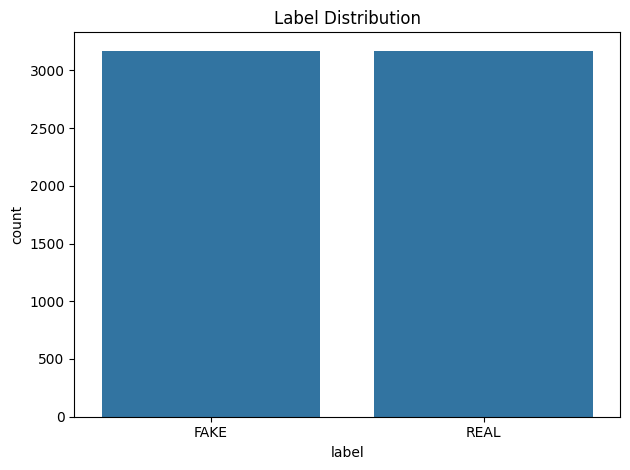

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))
sns.countplot(x='label', data=df)
plt.xticks([0, 1], ['FAKE', 'REAL'])
plt.title('Label Distribution')
plt.tight_layout()
plt.show()

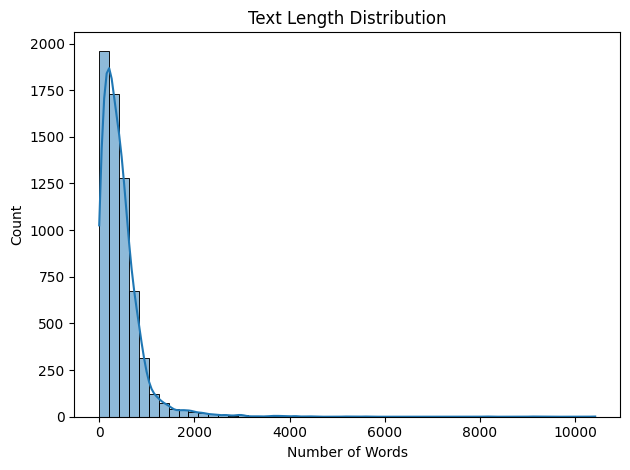

In [ ]:
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()

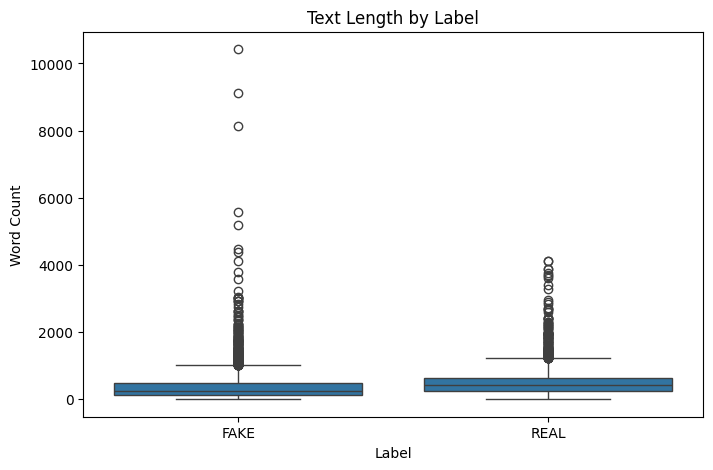

In [ ]:
# Boxplot of text length by label
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='text_length', data=df)
plt.xticks([0, 1], ['FAKE', 'REAL'])
plt.title('Text Length by Label')
plt.ylabel('Word Count')
plt.xlabel('Label')
plt.show()

<ipython-input-12-ddd91e660bfc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df_ngram, palette='viridis')


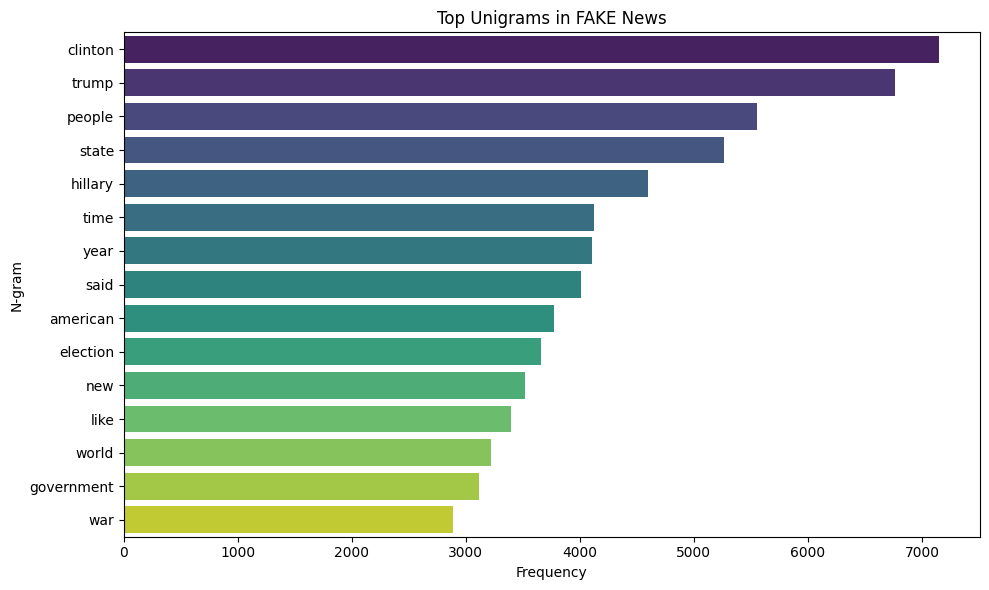

<ipython-input-12-ddd91e660bfc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df_ngram, palette='viridis')


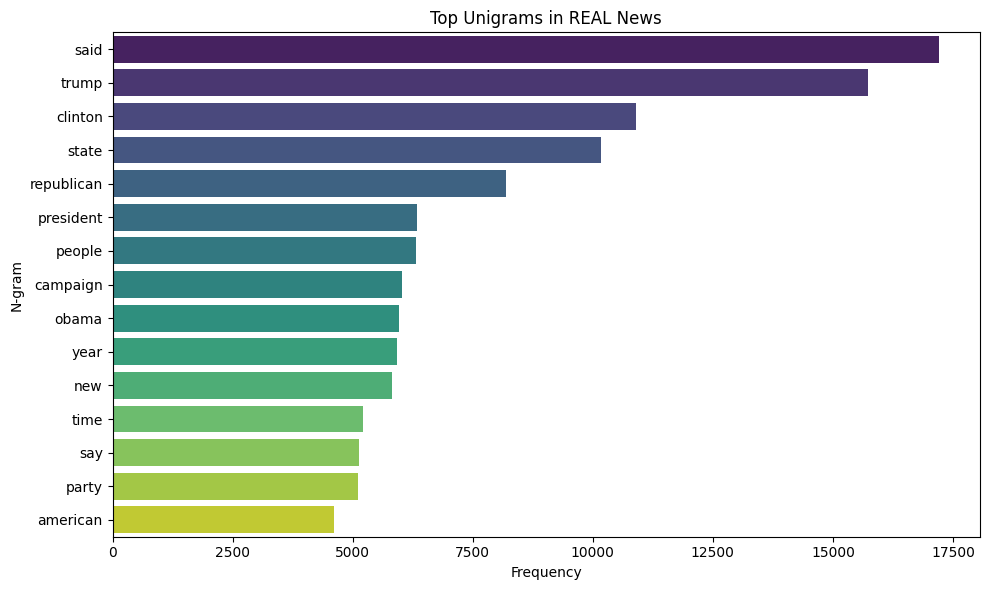

<ipython-input-12-ddd91e660bfc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df_ngram, palette='viridis')


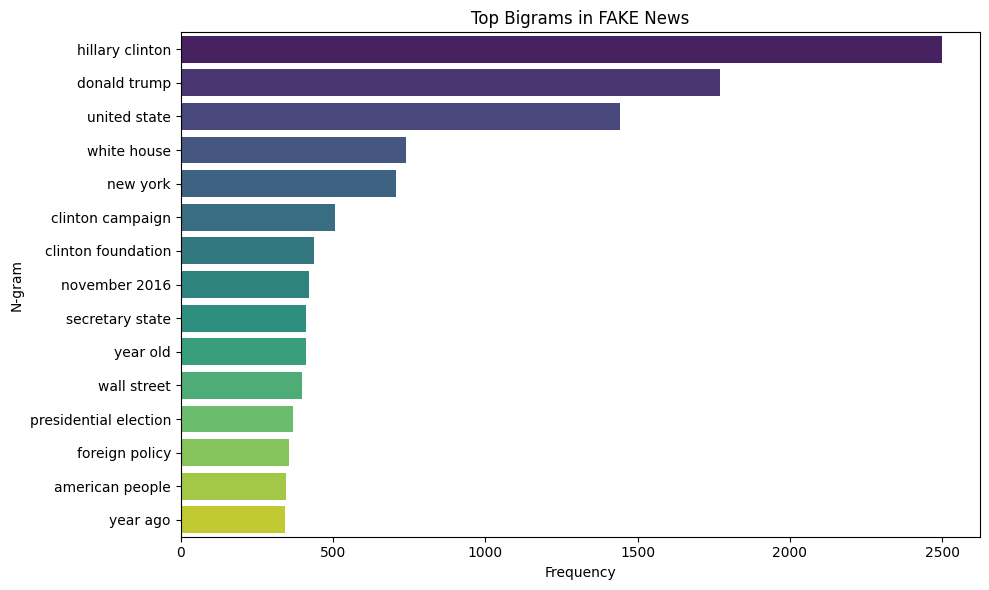

<ipython-input-12-ddd91e660bfc>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Ngram', data=df_ngram, palette='viridis')


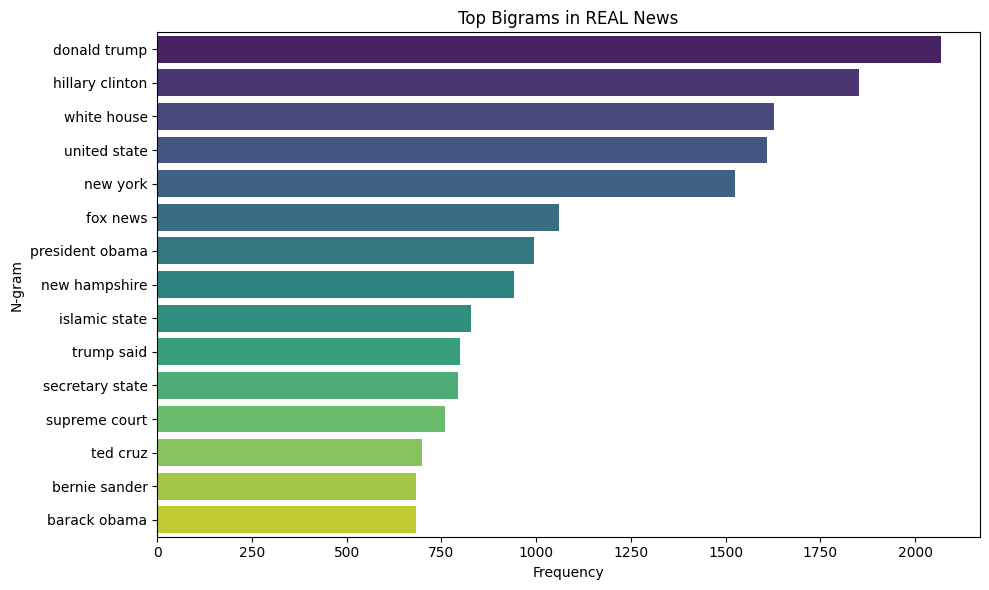

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Function to extract top N n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), n=15):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return pd.DataFrame(sorted(words_freq, key=lambda x: x[1], reverse=True)[:n], columns=['Ngram', 'Frequency'])

# Extract top words per label
top_words_fake = get_top_ngrams(df[df['label'] == 0]['clean_text'], (1, 1), 15)
top_words_real = get_top_ngrams(df[df['label'] == 1]['clean_text'], (1, 1), 15)
top_bigrams_fake = get_top_ngrams(df[df['label'] == 0]['clean_text'], (2, 2), 15)
top_bigrams_real = get_top_ngrams(df[df['label'] == 1]['clean_text'], (2, 2), 15)

# Plot function
def plot_ngrams(df_ngram, title):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Ngram', data=df_ngram, palette='viridis')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.tight_layout()
    plt.show()

# Plot unigrams and bigrams by label
plot_ngrams(top_words_fake, "Top Unigrams in FAKE News")
plot_ngrams(top_words_real, "Top Unigrams in REAL News")
plot_ngrams(top_bigrams_fake, "Top Bigrams in FAKE News")
plot_ngrams(top_bigrams_real, "Top Bigrams in REAL News")

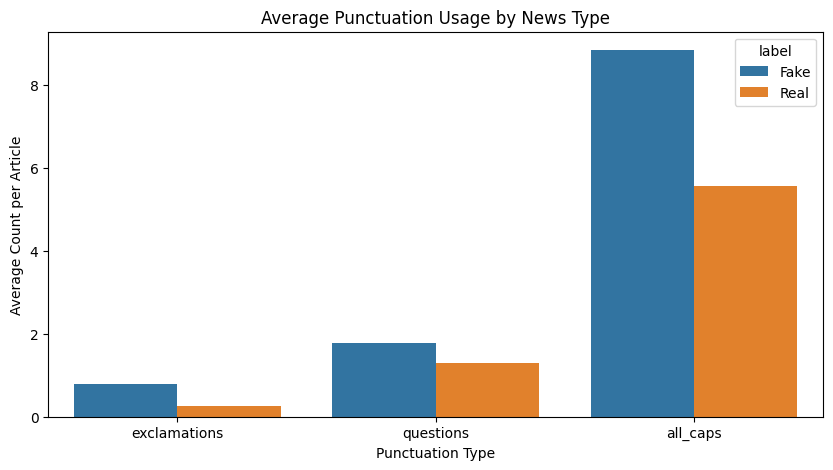

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Assuming your DataFrame is named df and has columns: 'text' and 'label' (0 or 1)

# Function to count punctuation and ALL CAPS words
def analyze_punctuation(text):
    exclamations = text.count('!')
    questions = text.count('?')
    all_caps_words = len(re.findall(r'\b[A-Z]{2,}\b', text))  # Words with 2+ uppercase letters
    return pd.Series([exclamations, questions, all_caps_words])

# Apply to DataFrame
df[['exclamations', 'questions', 'all_caps']] = df['text'].apply(analyze_punctuation)

# Group by numeric label (0: fake, 1: real)
punct_stats = df.groupby('label')[['exclamations', 'questions', 'all_caps']].mean().reset_index()

# Optional: Replace label with readable names for plot
punct_stats['label'] = punct_stats['label'].map({0: 'Fake', 1: 'Real'})

# Plot
plt.figure(figsize=(10, 5))
punct_stats_melted = pd.melt(punct_stats, id_vars='label', var_name='punctuation_type', value_name='average_count')
sns.barplot(data=punct_stats_melted, x='punctuation_type', y='average_count', hue='label')
plt.title("Average Punctuation Usage by News Type")
plt.ylabel("Average Count per Article")
plt.xlabel("Punctuation Type")
plt.show()


# NLP Feature Engineering

In [ ]:
!pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.5 MB/s eta 0:00:00


Imports

In [ ]:
import pandas as pd
import spacy
import textstat
import re
from textblob import TextBlob

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")


Sentiment Analysis

In [ ]:
df['sentiment_score'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity_score'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
print(df[['text', 'sentiment_score', 'subjectivity_score','label']].head())


                                                text  sentiment_score  \
0  Daniel Greenfield, a Shillman Journalism Fello...         0.036808   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...         0.036420   
2  U.S. Secretary of State John F. Kerry said Mon...         0.092083   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...         0.064556   
4  It's primary day in New York and front-runners...         0.267382   

   subjectivity_score  label  
0            0.562654      0  
1            0.518638      0  
2            0.348775      1  
3            0.503563      0  
4            0.420109      1  


Punctuation Features

In [ ]:
def punctuation_features(text):
    exclamations = text.count('!')
    questions = text.count('?')
    all_caps = len(re.findall(r'\b[A-Z]{2,}\b', text))
    return pd.Series([exclamations, questions, all_caps])

df[['num_exclamations', 'num_questions', 'num_all_caps']] = df['text'].apply(punctuation_features)

print(df[['text','num_exclamations', 'num_questions','num_all_caps','label']].head())


                                                text  num_exclamations  \
0  Daniel Greenfield, a Shillman Journalism Fello...                 0   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...                 0   
2  U.S. Secretary of State John F. Kerry said Mon...                 0   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...                 1   
4  It's primary day in New York and front-runners...                 2   

   num_questions  num_all_caps  label  
0              3            39      0  
1              0             2      0  
2              0             0      1  
3              0             6      0  
4              0             1      1  


Named Entity Count

In [ ]:
def extract_named_entities(text):
    doc = nlp(text)
    return len([ent.text for ent in doc.ents])

df['num_named_entities'] = df['clean_text'].apply(extract_named_entities)


KeyboardInterrupt: 

Parts of Speech Count

In [ ]:
def count_pos(text):
    doc = nlp(text)
    noun_count = sum(1 for token in doc if token.pos_ == 'NOUN')
    adj_count = sum(1 for token in doc if token.pos_ == 'ADJ')
    verb_count = sum(1 for token in doc if token.pos_ == 'VERB')
    return pd.Series([noun_count, adj_count, verb_count])

df[['num_nouns', 'num_adjectives', 'num_verbs']] = df['text'].apply(count_pos)

print(df[['text','num_nouns', 'num_adjectives','num_verbs','label']].head())


Readability Score

In [ ]:
df['readability_score'] = df['text'].apply(lambda x: textstat.flesch_reading_ease(x) if x.strip() else 0)


Clickbait Word Count

In [ ]:
clickbait_words = [
    'shocking', 'unbelievable', 'you won’t believe', 'you won\'t believe',
    'must see', 'exclusive', 'reveal', 'top secret', 'leaked', 'miracle', 'guaranteed'
]

def count_clickbait(text):
    text_lower = text.lower()
    return sum(1 for phrase in clickbait_words if phrase in text_lower)

df['clickbait_word_count'] = df['text'].apply(count_clickbait)


Text Length Features

In [ ]:
df['raw_text_length'] = df['text'].apply(len)
df['raw_word_count'] = df['text'].apply(lambda x: len(x.split()))


# Model Training and Testing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack

# Drop rows with missing labels
df = df.dropna(subset=['label'])

# Define your extra NLP features (from original text, already added to df)
extra_features = [
    'sentiment_score', 'subjectivity_score',
    'num_exclamations', 'num_questions', 'num_all_caps',
    'num_named_entities', 'num_nouns', 'num_adjectives', 'num_verbs',
    'readability_score', 'clickbait_word_count',
    'raw_text_length', 'raw_word_count'
]

# Split text and extra features together
X_text_train, X_text_test, X_extra_train, X_extra_test, y_train, y_test = train_test_split(
    df['clean_text'], df[extra_features], df['label'], test_size=0.2, random_state=42
)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_text_train)
X_test_tfidf = vectorizer.transform(X_text_test)

# Combine TF-IDF with extra features
X_train_combined = hstack([X_train_tfidf, X_extra_train])
X_test_combined = hstack([X_test_tfidf, X_extra_test])

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train_combined, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_combined)
print("Accuracy:", accuracy_score(y_test, y_pred))



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy and display classification report
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['FAKE', 'REAL'])

print(f"Accuracy: {acc:.4f}")
print("Classification Report:\n", report)


Accuracy: 0.9132
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.91      0.92      0.91       628
        REAL       0.92      0.91      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [ ]:
print("This Logistic Regression model uses TF-IDF features extracted from real news text.")
print("It attempts to separate FAKE and REAL news based on word importance.")
print("Further improvements may include hyperparameter tuning, using other classifiers, or deep learning approaches like BERT.")


This Logistic Regression model uses TF-IDF features extracted from real news text.
It attempts to separate FAKE and REAL news based on word importance.
Further improvements may include hyperparameter tuning, using other classifiers, or deep learning approaches like BERT.
